Name: Kunal Kiran Kamat

Class: BE Computer    Div: 'A'

Roll No.: 21CO056

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
dfx = pd.read_csv('uber.csv')

In [12]:
dfx

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0
...,...,...,...,...,...,...,...,...,...
17843,52767148,2012-04-14 02:47:00.000000111,18.1,2012-04-14 02:47:00 UTC,-73.949998,40.780385,-74.005577,40.709002,2.0
17844,32667836,2009-02-19 07:25:00.000000153,26.5,2009-02-19 07:25:00 UTC,-73.982980,40.762627,-73.872748,40.774345,5.0
17845,37364579,2012-05-04 03:54:12.0000001,4.9,2012-05-04 03:54:12 UTC,-73.962850,40.804438,-73.952757,40.818113,1.0
17846,16137370,2014-05-14 16:35:21.0000003,11.0,2014-05-14 16:35:21 UTC,-73.987277,40.738977,-73.976124,40.740195,1.0


Null Values Removal

In [ ]:
df = dfx.dropna()

In [ ]:
def haversine_distance(lat1, lon1, lat2, lon2):
  R = 6371
  dlat = np.radians(lat2 - lat1)
  dlon = np.radians(lon2 - lon1)
  a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2) * np.sin(dlon/2)
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
  distance = R * c  # Distance in kilometers
  return distance

In [ ]:
df['distance'] = df.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

<ipython-input-8-5d949c253044>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'] = df.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)


In [ ]:
df = df.drop(['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], axis=1)

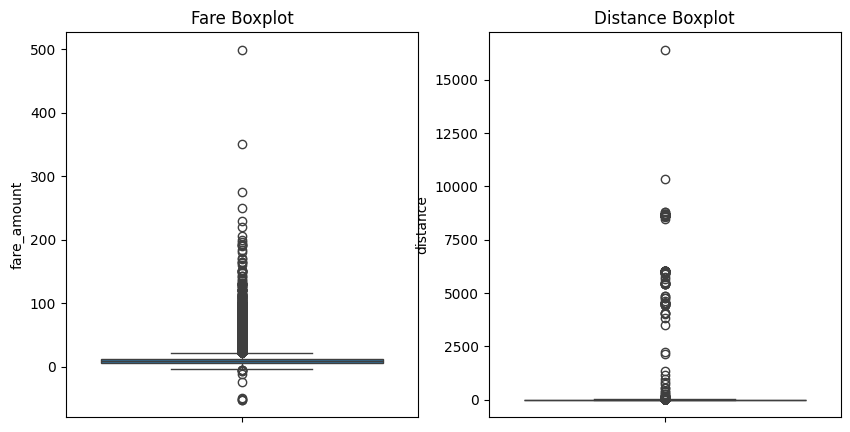

In [ ]:
# Visualize the 'fare' and 'distance' columns to identify outliers
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(df['fare_amount'])
plt.title('Fare Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(df['distance'])
plt.title('Distance Boxplot')

plt.show()

In [ ]:
# Remove outliers based on IQR
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['fare_amount'] >= Q1 - 1.5 * IQR) & (df['fare_amount'] <= Q3 + 1.5 * IQR)]
# df = df.drop(df[(df['fare_amount'] < Q1 - 1.5 * IQR) | (df['fare_amount'] > Q3 + 1.5 * IQR)].index)

Q1 = df['distance'].quantile(0.25)
Q3 = df['distance'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['distance'] >= Q1 - 1.5 * IQR) & (df['distance'] <= Q3 + 1.5 * IQR)]
# df = df.drop(df[(df['fare_amount'] < Q1 - 1.5 * IQR) | (df['fare_amount'] > Q3 + 1.5 * IQR)].index)


             distance  fare_amount
distance     1.000000     0.754566
fare_amount  0.754566     1.000000


<Axes: >

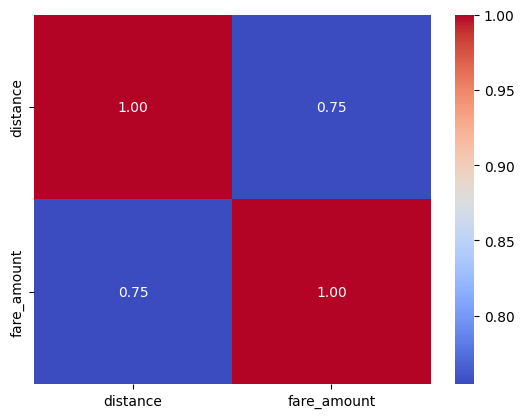

In [ ]:
# Calculate the correlation matrix
cm = df[['distance','fare_amount']]
correlation_matrix = cm.corr()

# Visualize the correlation matrix using a heatmap
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

In [ ]:
df2=df.drop(columns=['key','pickup_datetime'])

In [ ]:
df2

,Unnamed: 0,fare_amount,passenger_count,distance
0,24238194,7.5,1,1.683323
1,27835199,7.7,1,2.457590
2,44984355,12.9,1,5.036377
3,25894730,5.3,3,1.661683
4,17610152,16.0,5,4.475450
...,...,...,...,...
199994,3189201,12.0,1,1.122878
199995,42598914,3.0,1,0.112210
199996,16382965,7.5,1,1.875050
199998,20259894,14.5,1,3.539715


<Axes: >

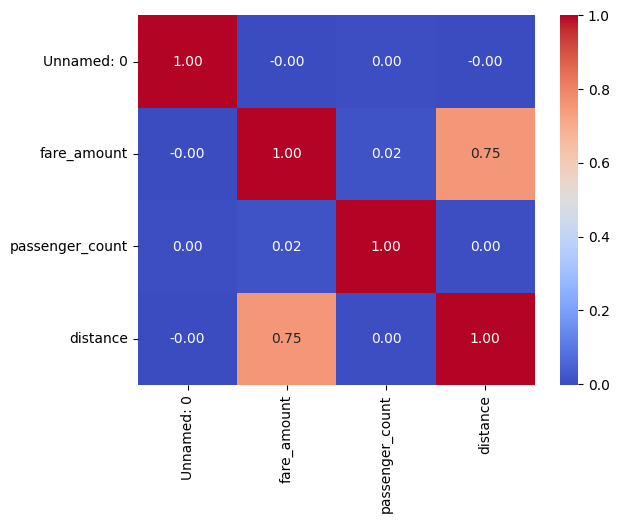

In [ ]:
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt='.2f')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

Linear Regression Model :

In [ ]:
x=df['distance']
y=df['fare_amount']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

lr=LinearRegression()
model=lr.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))


In [ ]:
y_train_pred = lr.predict(x_train.values.reshape(-1,1))
y_test_pred = lr.predict(x_test.values.reshape(-1,1))

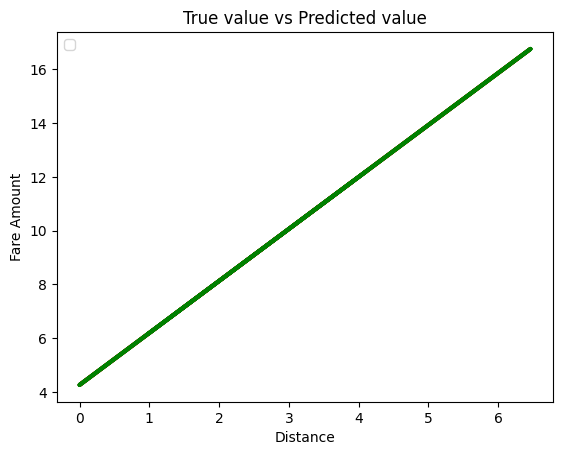

In [ ]:
plt.xlabel('Distance')
plt.ylabel('Fare Amount')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
plt.plot(x_test,y_test_pred,color='red',linewidth=3)
plt.plot(x_train,y_train_pred,color='green',linewidth=3)
plt.xticks()
plt.yticks()
plt.show()

In [ ]:
#Evaluation Metrics
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_train_pred)
print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print("\n")


The model performance for training set
--------------------------------------
MSE is 5.989056513039232




In [ ]:
mse = mean_squared_error(y_test, y_test_pred)
print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print("\n\n\n")

The model performance for testing set
--------------------------------------
MSE is 5.988753057598997






In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_train, y_train_pred)
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print("\n")

print("The model performance for testing set")
print("--------------------------------------")
mae = mean_absolute_error(y_test, y_test_pred)
print('MAE is {}'.format(mae))
print("\n\n\n")

The model performance for training set
--------------------------------------
MAE is 1.7456225264490253


The model performance for testing set
--------------------------------------
MAE is 1.751331493520903






In [ ]:
from sklearn.metrics import r2_score
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 2.4472548933528016
R2 score is 0.5689581226712435




In [ ]:
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 2.4471928934187015
R2 score is 0.5710083823192472


Random Forest Regression:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train.values.reshape(-1, 1), x_train.values.reshape(-1, 1))
y_pred_rf = rf_model.predict(x_test.values.reshape(-1, 1))


r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest Regression - R2 Score: {r2_rf}")
print(f"Random Forest Regression - RMSE: {rmse_rf}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regression - R2 Score: -2.434667362238116, RMSE: 6.924463673581385
